# My first attempt
I want to see if the cubic approximation of my "ideal demand curve" results in the desired dynamics. Aka is it worth arguing for and approximating?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

It is important to note that price is the y axis and quantity is the x axis. Also quantity in the demand curve indicates the amount purchased rather than the amount desired. This is to allow for rarity of goods to be included in the plot.

In [2]:
xvals, yvals = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1)) 

In [3]:
#We assume that all constants are greater than zero
def q_D(a,b,c,d,f,x): 
    return -a*(x-d)**3+b*(x-f)**2+c*(x-d)
def q_S(g,h,x):
    return g+ h*x
def p_dt(alpha,a,b,c,d,f,g,h, x): #his is alpha(q_D - q_S) 
    return alpha*(-1*a*x**3 +(3*a*d+b)*x**2 - (h+3*a*d**2+2*b*f-c)*x -(g - a*d**3 - b*f**2 +c*d))

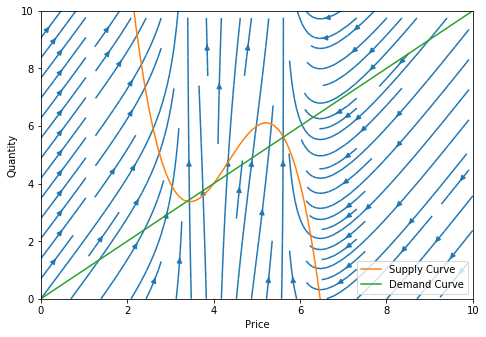

In [13]:
a = 1
b = 4
c = 5
d = 3
f = 4
g = 0
h = 1
alpha = 0.5
xdot = p_dt(alpha,a,b,c,d,f,g,h, xvals)
ydot = q_D(a, b, c,d,f,xvals)

# plot dynamics of price and quantity movements
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.streamplot(xvals, yvals, xdot, ydot)
a1.plot(xvals[0], q_D(a,b,c,d,f,xvals[0]))
a1.plot(xvals[0], q_S(g,h,xvals[0]))
a1.set_ylim(0,10)
a1.set_xlabel('Price')
a1.set_ylabel('Quantity')
plt.legend(labels = ["Supply Curve", "Demand Curve"])
plt.savefig("Notebook_Figures/2d_cubic_snd.png",bbox_inches='tight')

## 1-D Plot
This uses the style found for example in __Mathematical Biology: an Introduction__ By J.D. Murray in Ch. 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


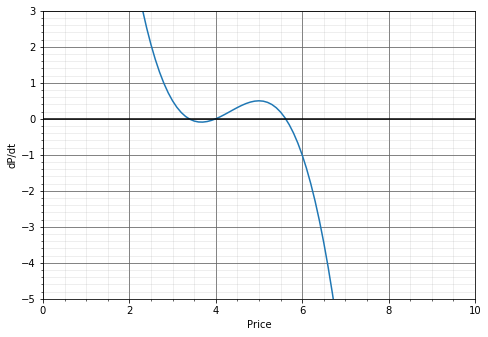

In [11]:
#plot the 1-D DS
y = p_dt(alpha, a, b, c,d,f,g,h, xvals[0])
fig = plt.figure(tight_layout=True)
a1 = fig.add_axes([0,0,1,1])

a1.plot(xvals[0],y)
a1.plot([0,10],[0,0],'k')
#a1.plot(6.66666667, 0, 'ro')

a1.set_xlim(0,10)
a1.set_ylim(-5,3)
a1.set_xlabel('Price')
a1.set_ylabel('dP/dt')

a1.grid(b=True, which='major', color='#666666', linestyle='-')
a1.minorticks_on()
a1.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.savefig("Notebook_Figures/1d_cubic_snd_price.png",bbox_inches='tight')